In [1]:
import pandas as pd

df = pd.read_csv (r'~/Downloads/values.csv')

In [45]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [2]:
df.describe()

,a,b,c
count,2.930000e+02,293.000000,293.000000
mean,-3.793106e-06,0.097745,-532.208275
std,9.057253e-07,0.017059,87.844236
min,-1.191466e-05,0.062540,-1112.948629
25%,-4.243026e-06,0.086497,-582.197177
50%,-3.729551e-06,0.096546,-526.825773
75%,-3.183655e-06,0.107152,-475.494365
max,-1.884254e-06,0.237608,-363.625559


# Load Values From File

In [227]:
import glob
import numpy as np

path = r'../data_tue/*' # use your path
all_folders = glob.glob(path)


li = []
df_out=pd.DataFrame(columns=['id','real_temp','adc_value'])
df_out_id=pd.DataFrame(columns=['id','tmp_l','adc_l','tmp_m','adc_m','tmp_h','adc_h'])

# dl=pd.DataFrame(columns=['real_temp','header','frimware_adc','col4','col5','col6','col7','col8','col9','col10','col11','col12','col3','col4','col15'])
i=1
j=1
l=1
for folder in all_folders:
    df=pd.read_csv(folder+'/data.txt', index_col=None, header=None)
    np_low_temp=np.array([])
    np_low_adc=np.array([])
    np_high_temp=np.array([])
    np_high_adc=np.array([])
    np_mid_temp=np.array([])
    np_mid_adc=np.array([])
    for row in df.iterrows():
        try:
            if row[1][3]==265:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][5])
            else:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][6])
            if df_out.loc[i]['real_temp']<10:
                np_low_temp = np.append(np_low_temp, df_out.loc[i]['real_temp'])
                np_low_adc = np.append(np_low_adc, df_out.loc[i]['adc_value'])
            elif df_out.loc[i]['real_temp']>60:
                np_high_temp = np.append(np_high_temp, df_out.loc[i]['real_temp'])
                np_high_adc = np.append(np_high_adc, df_out.loc[i]['adc_value'])
            else:
                np_mid_temp =  np.append(np_mid_temp, df_out.loc[i]['real_temp'])
                np_mid_adc =  np.append(np_mid_adc, df_out.loc[i]['adc_value'])
            i+=1
        except:
            print (bcolors.WARNING + "Warning: There has Been an error with ID:  "+str(folder.split('/')[2])+ bcolors.ENDC)
            break
    #removing some outliers
#     if np.average(np_low_adc)<OUTLIER and np.average(np_mid_adc)<OUTLIER and np.average(np_high_adc)<OUTLIER and np.average(np_low_adc)>OUTLIER_LOW and np.average(np_mid_adc)>OUTLIER_LOW and np.average(np_high_adc)>OUTLIER_LOW:
        #probably we could double check the std, to ensure that value of the sensor is good.
    df_out_id.loc[l]= folder.split('/')[2],np.average(np_low_temp),np.average(np_low_adc),np.average(np_mid_temp),np.average(np_mid_adc),np.average(np_high_temp),np.average(np_high_adc)
    l+=1
    if j%50 == 0:
#         print (bcolors.WARNING+"Printing ID:  "+str(folder.split('/')[2])+bcolors.ENDC)
        print ("Loading file number:........."+str(j))
    j+=1
    #     df = pd.read_csv(folder+'/data.txt', index_col=None, header=0)
# frame = pd.concat(li, axis=0, ignore_index=True)

/Users/rbol384/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rbol384/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Loading file number:.........50
Loading file number:.........100
Loading file number:.........150
Loading file number:.........200
Loading file number:.........250


In [433]:
#Clean up
df_out_id=df_out_id.dropna()
df_out=df_out.dropna()

In [567]:
OUTLIER_TOP=15000
OUTLIER_LOW=6000

df_clean=df_out_id.copy()
# df_clean = df_clean.drop(df_out_id[(df_out_id.adc_l > OUTLIER_TOP].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m > 10000 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h < OUTLIER_LOW )].index)

# df_clean = df_clean.drop(df_clean[(df_clean.tmp_l > 3 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.tmp_l < 3.2 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.tmp_h > 75)].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_m > 36.1)].index)


# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
df_clean=df_clean.dropna()


In [568]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 1 to 298
Data columns (total 7 columns):
id       83 non-null object
tmp_l    83 non-null float64
adc_l    83 non-null float64
tmp_m    83 non-null float64
adc_m    83 non-null float64
tmp_h    83 non-null float64
adc_h    83 non-null float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


In [569]:
df_out_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 299
Data columns (total 7 columns):
id       293 non-null object
tmp_l    293 non-null float64
adc_l    293 non-null float64
tmp_m    293 non-null float64
adc_m    293 non-null float64
tmp_h    293 non-null float64
adc_h    293 non-null float64
dtypes: float64(6), object(1)
memory usage: 18.3+ KB


In [570]:
df_out_id.head(15)

,id,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h
1,BHG2WDMA8C2DVJ7C27B3DNQZGT,3.7,8360.481481,35.9,9303.074074,73.8,10733.296296
2,XKDGHFNW6DTP98KAKHFSFYGA5Z,3.6,7620.259259,36.0,8522.464286,78.2,10231.629630
3,0N60TJ7AG5RVZCNGW6PYVAH9KV,2.3,8204.888889,36.2,9152.518519,70.0,10427.777778
4,9L9505L8N1DJW8NT6ABXB4YBQT,2.3,8035.296296,36.0,8970.518519,70.9,10192.481481
5,F6BQV0XMW1B9GNXVRRWDDDJ3TR,2.0,8532.857143,35.6,9446.296296,75.0,10863.777778
6,FTW3VFXJ9HS6LMLNXPTXFKCLKW,3.9,7679.888889,35.9,8584.962963,77.6,10227.629630
8,N72591ZCG6HD346MX22D9GD61S,2.6,7890.666667,36.0,8883.111111,71.4,10181.407407
9,Y0GKPWGVW3NXW79TLSZ0BV02YV,3.8,7408.407407,36.0,8269.185185,73.3,9699.222222
10,K8LKW1RZSR90GLVRPS4V66DSAR,2.7,7505.259259,35.8,8490.555556,75.2,10118.111111
11,3RWNYT97TB2B1RG2G24S1V5PFY,3.8,8017.037037,35.9,8853.185185,73.5,10359.555556


In [571]:
df_out_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 299
Data columns (total 7 columns):
id       293 non-null object
tmp_l    293 non-null float64
adc_l    293 non-null float64
tmp_m    293 non-null float64
adc_m    293 non-null float64
tmp_h    293 non-null float64
adc_h    293 non-null float64
dtypes: float64(6), object(1)
memory usage: 18.3+ KB


In [572]:
df_clean['n_m']=0
df_clean['n_l']=df_clean['adc_l']-df_clean['adc_m']
df_clean['n_h']=df_clean['adc_h']-df_clean['adc_m']

In [573]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_m,n_l,n_h
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000
mean,3.689146,7922.827492,36.037349,8806.935537,72.285429,10211.739441,0.0,-884.108045,1404.803904
std,0.282206,455.434141,0.262591,457.405997,1.265874,477.680768,0.0,47.832053,82.801957
min,3.200000,7106.666667,35.600000,8011.555556,70.000000,9259.962963,0.0,-1018.148148,1248.407407
25%,3.524545,7572.944444,35.850000,8449.666667,71.300000,9843.129979,0.0,-914.576720,1351.419312
50%,3.700000,7924.111111,36.000000,8825.653846,72.100000,10201.444444,0.0,-880.629630,1398.074074
75%,3.800000,8238.311966,36.200000,9109.943732,73.300000,10489.907407,0.0,-855.019231,1457.500000
max,4.300000,8947.518519,36.700000,9887.851852,75.000000,11460.925926,0.0,-752.259259,1704.148148


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1843f7358>,
      dtype=object)

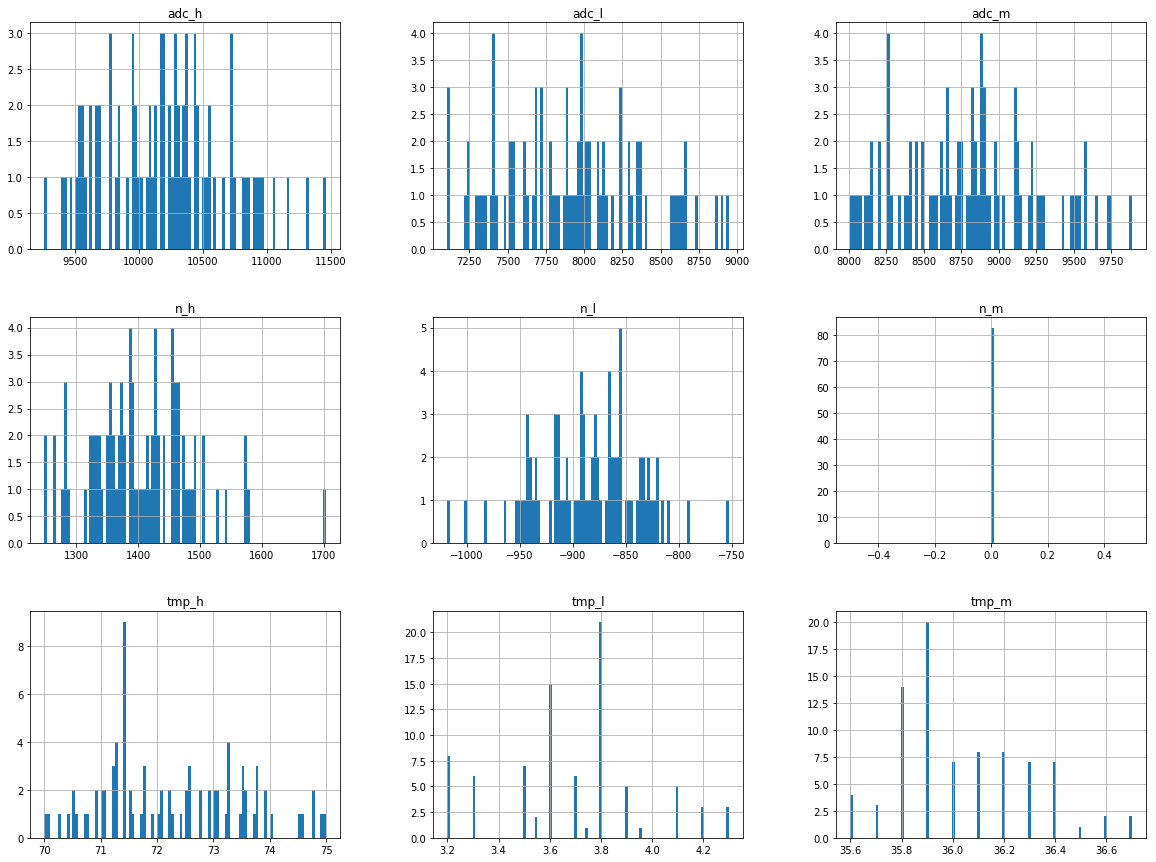

In [574]:
df_clean.hist(bins=100, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x186d5efd0>,
      dtype=object)

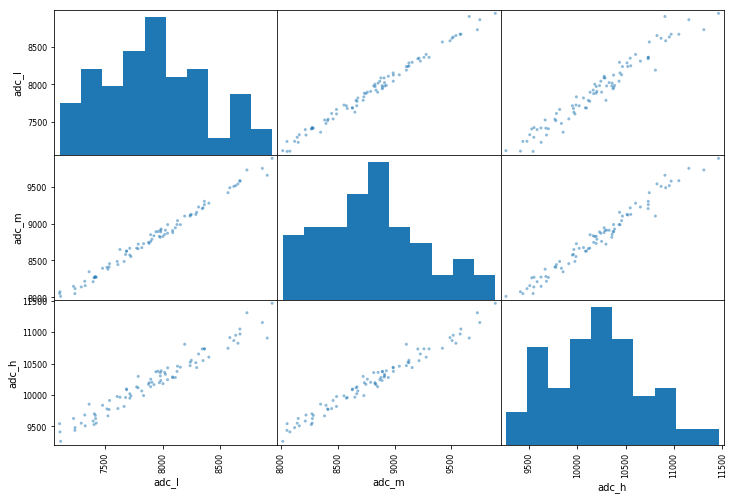

In [575]:
from pandas.plotting import scatter_matrix

attributes = ["adc_l", "adc_m", "adc_h"]
scatter_matrix(df_clean[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x187d0e160>,
      dtype=object)

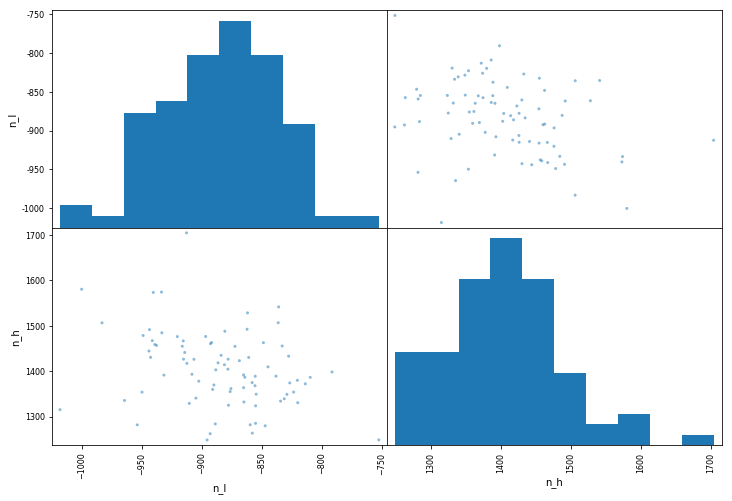

In [576]:
from pandas.plotting import scatter_matrix

attributes = ["n_l", "n_h"]
scatter_matrix(df_clean[attributes], figsize=(12, 8))

In [577]:
corr_matrix = df_clean.corr()
corr_matrix["adc_m"].sort_values(ascending=False)

adc_m    1.000000
adc_l    0.994518
adc_h    0.985251
n_h      0.159773
tmp_h    0.133250
tmp_m    0.068873
n_l     -0.093422
tmp_l   -0.160839
n_m           NaN
Name: adc_m, dtype: float64

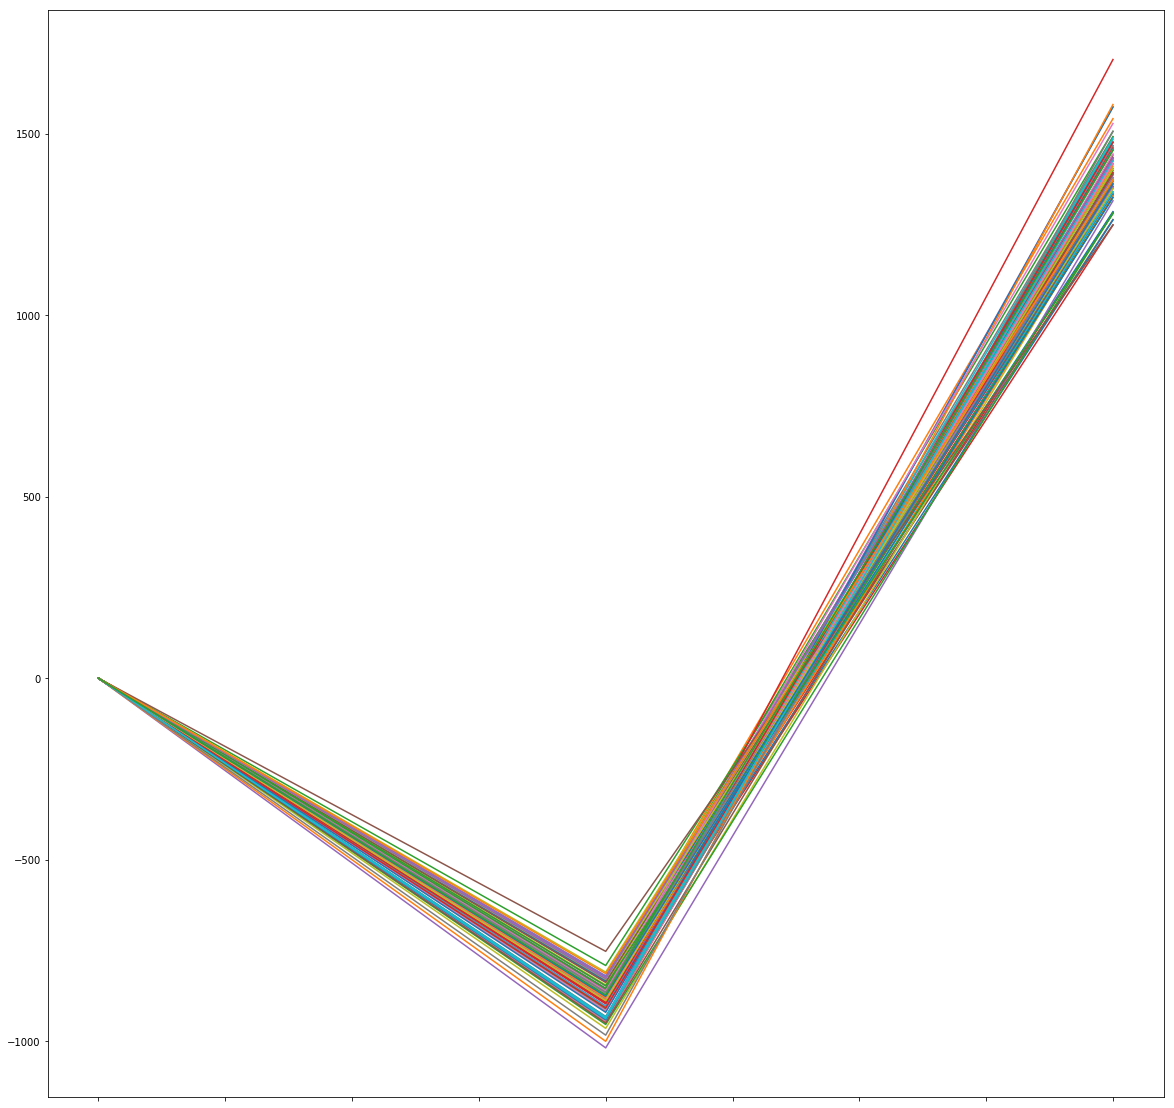

In [578]:
df=df_clean.drop(columns=['tmp_l','tmp_m','tmp_h','id'])
df=df.drop(columns=['adc_l','adc_m','adc_h'])

df.T.plot(figsize=(20, 20),legend=False)

In [579]:
df.T

,1,9,11,17,18,22,27,31,34,37,...,266,267,268,275,281,282,293,295,296,298
n_m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n_l,-942.592593,-860.777778,-836.148148,-895.444444,-906.407407,-878.115385,-848.481481,-859.518519,-855.481481,-819.851852,...,-896.649573,-827.469577,-752.259259,-886.296296,-864.962963,-888.181217,-937.629630,-875.574074,-813.555556,-872.185185
n_h,1430.222222,1430.037037,1506.370370,1248.407407,1425.851852,1404.192308,1462.518519,1281.851852,1367.777778,1330.407407,...,1476.119658,1432.814815,1248.629630,1418.148148,1363.444444,1402.707672,1456.444444,1361.518519,1372.037037,1454.444444


In [580]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_m,n_l,n_h
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000
mean,3.689146,7922.827492,36.037349,8806.935537,72.285429,10211.739441,0.0,-884.108045,1404.803904
std,0.282206,455.434141,0.262591,457.405997,1.265874,477.680768,0.0,47.832053,82.801957
min,3.200000,7106.666667,35.600000,8011.555556,70.000000,9259.962963,0.0,-1018.148148,1248.407407
25%,3.524545,7572.944444,35.850000,8449.666667,71.300000,9843.129979,0.0,-914.576720,1351.419312
50%,3.700000,7924.111111,36.000000,8825.653846,72.100000,10201.444444,0.0,-880.629630,1398.074074
75%,3.800000,8238.311966,36.200000,9109.943732,73.300000,10489.907407,0.0,-855.019231,1457.500000
max,4.300000,8947.518519,36.700000,9887.851852,75.000000,11460.925926,0.0,-752.259259,1704.148148


In [588]:
high_tmp_mean=df_clean.describe()['tmp_h']['mean']
low_tmp_mean=df_clean.describe()['tmp_l']['mean']
n_l_mean=df_clean.describe()['n_l']['mean']
n_h_mean=df_clean.describe()['n_h']['mean']
# print(str(high_tmp_mean)+str(", ")+str(low_tmp_mean)+str(", ")+str(n_h_mean)+str(", ")+str(n_l_mean))
ratio=(high_tmp_mean-low_tmp_mean)/(n_h_mean-n_l_mean)

print(bcolors.HEADER +"*********************************************")
print("*********************************************")
print("By Subtracting the average to the measurments")
print("*********************************************")
print("*********************************************"+bcolors.ENDC)


print("For the High Temperatures")
print("Standard Deviation is:= "+str(df_clean.describe()['n_h']['std'])+" Which Translates to:= "+str(df_clean.describe()['n_h']['std']*ratio)+ "  degrees")
print("75% of the data will be := "+str((df_clean.describe()['n_h']['mean']-df_clean.describe()['n_h']['75%'])*ratio)+" degrees of Error")

print("\nFor the Low Temperatures")
print("Standard Deviation is:= "+str(df_clean.describe()['n_l']['std'])+" Which Translates to:= "+str(df_clean.describe()['n_l']['std']*ratio)+ "  degrees")
print("75% of the data will be := "+str((df_clean.describe()['n_l']['mean']-df_clean.describe()['n_l']['75%'])*ratio)+" degrees of Error")

#     ratio
# (df_clean.describe()['tmp_h']['mean']-df_clean.describe()['tmp_l']['mean'])/(df_clean.describe()['n_h']['mean']-df_clean.describe()['n_l']['mean'])
# df_clean.describe()['n_l']['mean']

*********************************************
*********************************************
By Subtracting the average to the measurments
*********************************************
*********************************************
For the High Temperatures
Standard Deviation is:= 82.8019568138862 Which Translates to:= 2.4814875259251354  degrees
75% of the data will be := -1.5792465501167037 degrees of Error

For the Low Temperatures
Standard Deviation is:= 47.8320531308228 Which Translates to:= 1.4334763060046374  degrees
75% of the data will be := -0.8717611457964988 degrees of Error


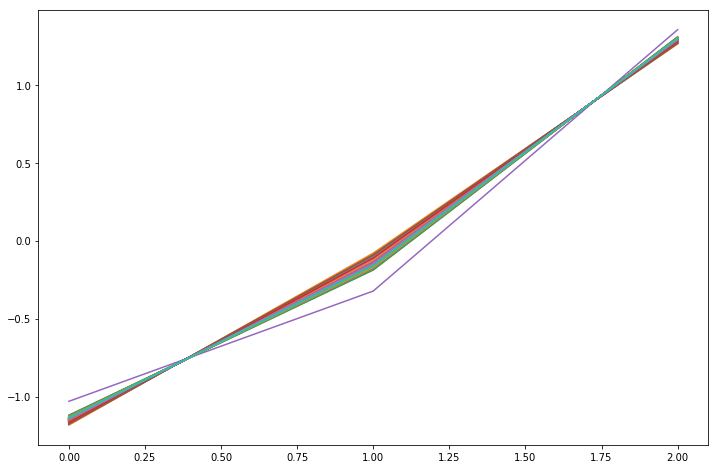

In [582]:
df_scaled.plot( figsize=(12, 8), legend=False)

In [583]:
df_scaled.T.describe()

,0,1,2
count,130.000000,130.000000,130.000000
mean,-1.148355,-0.140272,1.288627
std,0.015954,0.026299,0.010393
min,-1.182922,-0.323133,1.262670
25%,-1.156498,-0.154334,1.283149
50%,-1.148147,-0.140991,1.289139
75%,-1.140263,-0.126652,1.294597
max,-1.030779,-0.079748,1.353913


In [584]:
df_out['real_temp'].describe()

count    24692.000000
mean        36.723084
std         28.679347
min          1.900000
25%          3.600000
50%         35.900000
75%         71.300000
max         79.700000
Name: real_temp, dtype: float64

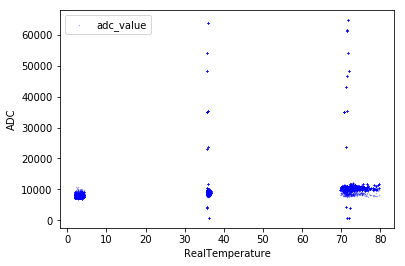

In [585]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

x = df_out['real_temp']
y = df_out['adc_value']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s=0.1, c="b", alpha=0.5)
plt.xlabel("RealTemperature")
plt.ylabel("ADC")
plt.legend(loc='upper left')
plt.show()

In [566]:
##ML

In [ ]:
df_norm[]